In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Yelp_reviews.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       27290 non-null  object
 1   review_id     27290 non-null  object
 2   text          27290 non-null  object
 3   votes.cool    27290 non-null  int64 
 4   business_id   27290 non-null  object
 5   votes.funny   27290 non-null  int64 
 6   stars         27290 non-null  int64 
 7   date          27290 non-null  object
 8   type          27290 non-null  object
 9   votes.useful  27290 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


In [4]:
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0


In [6]:
print(type(df))



<class 'pandas.core.frame.DataFrame'>


In [7]:
from spacy.lang.en import English

nlp = English()

all_tokens = []


for texto in df['text']:
    
    doc = nlp(texto)
   
    token_list = [token.text for token in doc]
    all_tokens.append(token_list)


print("Tokens de la primera reseña:", all_tokens[0])
print("Total de reseñas tokenizadas:", len(all_tokens))


Tokens de la primera reseña: ['Mr', 'Hoagie', 'is', 'an', 'institution', '.', 'Walking', 'in', ',', 'it', 'does', 'seem', 'like', 'a', 'throwback', 'to', '30', 'years', 'ago', ',', 'old', 'fashioned', 'menu', 'board', ',', 'booths', 'out', 'of', 'the', '70s', ',', 'and', 'a', 'large', 'selection', 'of', 'food', '.', 'Their', 'speciality', 'is', 'the', 'Italian', 'Hoagie', ',', 'and', 'it', 'is', 'voted', 'the', 'best', 'in', 'the', 'area', 'year', 'after', 'year', '.', 'I', 'usually', 'order', 'the', 'burger', ',', 'while', 'the', 'patties', 'are', 'obviously', 'cooked', 'from', 'frozen', ',', 'all', 'of', 'the', 'other', 'ingredients', 'are', 'very', 'fresh', '.', 'Overall', ',', 'its', 'a', 'good', 'alternative', 'to', 'Subway', ',', 'which', 'is', 'down', 'the', 'road', '.']
Total de reseñas tokenizadas: 27290


In [8]:
#Stop words

import spacy
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS


print('First ten stop words: ', list(spacy_stopwords) [:10])
cleaned_tokens = []
for token_list in all_tokens:
    filtered_tokens = [token for token in token_list if token.lower() not in spacy_stopwords]
    cleaned_tokens.append(filtered_tokens)


print("Tokens filtrados (sin stop words) de la primera reseña:", cleaned_tokens[0])
print("Total de reseñas procesadas:", len(cleaned_tokens))

df['cleaned_tokens'] = cleaned_tokens
df.to_csv('yelp_reviews_with_lemmatized_tokens.csv', index=False)


First ten stop words:  ['name', 'much', 'rather', 'still', 'off', 'of', 'myself', 'fifteen', 'part', 'back']
Tokens filtrados (sin stop words) de la primera reseña: ['Mr', 'Hoagie', 'institution', '.', 'Walking', ',', 'like', 'throwback', '30', 'years', 'ago', ',', 'old', 'fashioned', 'menu', 'board', ',', 'booths', '70s', ',', 'large', 'selection', 'food', '.', 'speciality', 'Italian', 'Hoagie', ',', 'voted', 'best', 'area', 'year', 'year', '.', 'usually', 'order', 'burger', ',', 'patties', 'obviously', 'cooked', 'frozen', ',', 'ingredients', 'fresh', '.', 'Overall', ',', 'good', 'alternative', 'Subway', ',', 'road', '.']
Total de reseñas procesadas: 27290


In [9]:
nlp = spacy.load('en_core_web_sm')

lemmatized_tokens = []

# Lematizar 
for token_list in cleaned_tokens:
    
    text = ' '.join(token_list)
    doc = nlp(text)
   
    lemmatized_list = [token.lemma_.lower() for token in doc if token.is_alpha]
    lemmatized_tokens.append(lemmatized_list)


print("Tokens lematizados de la primera reseña:", lemmatized_tokens[0])
print("Total de reseñas procesadas:", len(lemmatized_tokens))


df['lemmatized_tokens'] = lemmatized_tokens

Tokens lematizados de la primera reseña: ['mr', 'hoagie', 'institution', 'walk', 'like', 'throwback', 'year', 'ago', 'old', 'fashioned', 'menu', 'board', 'booth', 'large', 'selection', 'food', 'speciality', 'italian', 'hoagie', 'vote', 'good', 'area', 'year', 'year', 'usually', 'order', 'burger', 'patty', 'obviously', 'cook', 'frozen', 'ingredient', 'fresh', 'overall', 'good', 'alternative', 'subway', 'road']
Total de reseñas procesadas: 27290


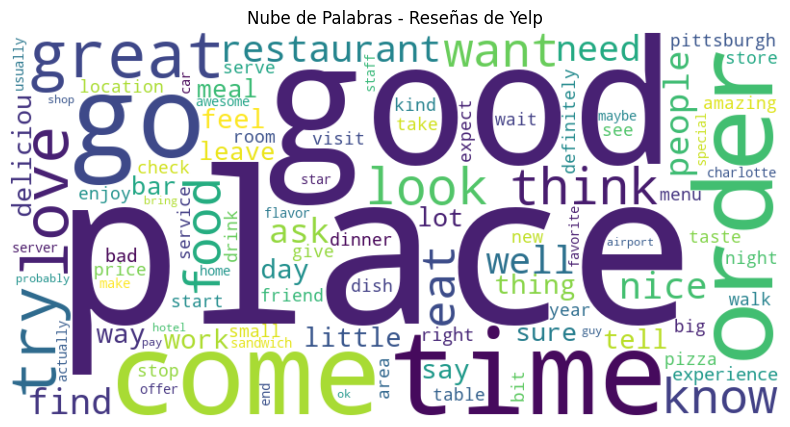

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



all_text = ' '.join([' '.join(tokens) for tokens in lemmatized_tokens])


wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, random_state=42).generate(all_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reseñas de Yelp')
plt.show()

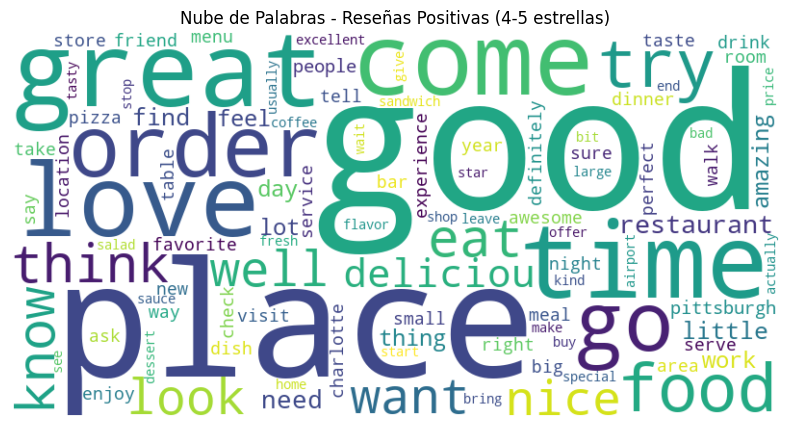

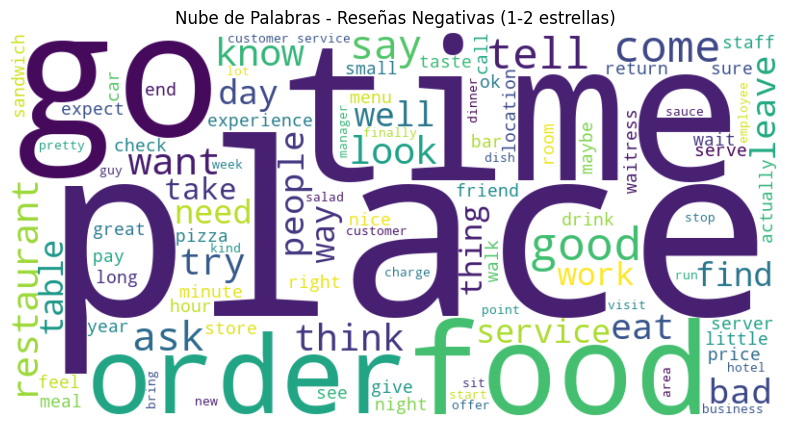

In [11]:



positive_tokens = [' '.join(tokens) for tokens, stars in zip(lemmatized_tokens, df['stars']) if stars >= 4]
negative_tokens = [' '.join(tokens) for tokens, stars in zip(lemmatized_tokens, df['stars']) if stars <= 2]

# Nube para reseñas positivas
positive_text = ' '.join(positive_tokens)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', max_words=100, random_state=42).generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reseñas Positivas (4-5 estrellas)')
plt.show()

# Nube para reseñas negativas
negative_text = ' '.join(negative_tokens)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', max_words=100, random_state=42).generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reseñas Negativas (1-2 estrellas)')
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


texts = [' '.join(tokens) for tokens in lemmatized_tokens]


tfidf_vectorizer = TfidfVectorizer(lowercase=False)  

# Vectorizar los textos
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)


feature_names = tfidf_vectorizer.get_feature_names_out()


print("Dimensiones de la matriz TF-IDF:", tfidf_matrix.shape)
print("Primeras 10 palabras del vocabulario:", feature_names[:10])

Dimensiones de la matriz TF-IDF: (27290, 32566)
Primeras 10 palabras del vocabulario: ['aa' 'aaa' 'aaaaaa' 'aaaaaaaand' 'aaaaaaagh' 'aaaaaand' 'aaaaah'
 'aaaaawesome' 'aaaand' 'aaaanyway']


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [14]:
df["sentiment_bin"] = df["stars"].apply(lambda x: 1 if x > 3 else 0)

In [15]:
X = tfidf_matrix
y = df["sentiment_bin"]

In [16]:
X

<27290x32566 sparse matrix of type '<class 'numpy.float64'>'
	with 1158122 stored elements in Compressed Sparse Row format>

In [17]:
X[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [18]:
y

0        1
1        1
2        1
3        1
4        0
        ..
27285    1
27286    1
27287    0
27288    0
27289    0
Name: sentiment_bin, Length: 27290, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [21]:
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.7504580432392818
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.35      0.51      2038
           1       0.72      0.99      0.83      3420

    accuracy                           0.75      5458
   macro avg       0.83      0.67      0.67      5458
weighted avg       0.80      0.75      0.71      5458



In [22]:
import joblib


# Predecir sentimientos para todas las reseñas
predictions = nb_classifier.predict(tfidf_matrix)


df['TARGET'] = ['POS' if pred == 1 else 'NEG' for pred in predictions]


print(df[['text', 'TARGET']].head())


print("\nDistribución de predicciones:")
print(df['TARGET'].value_counts())

                                                text TARGET
0  Mr Hoagie is an institution. Walking in, it do...    POS
1  Excellent food. Superb customer service. I mis...    POS
2  Yes this place is a little out dated and not o...    POS
3  All the food is great here. But the best thing...    POS
4  We checked this place out this past Monday for...    POS

Distribución de predicciones:
TARGET
POS    22672
NEG     4618
Name: count, dtype: int64


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
try:
    y_pred_proba = nb_classifier.predict_proba(X_test)[:, 1]  
    print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
except Exception as e:
    print("Error al calcular ROC-AUC:", e)

ROC-AUC: 0.8635309241372979


In [24]:
df_valid = df[df['stars'].isin([1, 2, 4, 5])].copy()


true_labels = [1 if stars >= 4 else 0 for stars in df_valid['stars']]
pred_labels = [1 if target == 'POS' else 0 for target in df_valid['TARGET']]


print("\nEvaluación de TARGET en reseñas con estrellas 1, 2, 4, 5:")
print("Reporte de clasificación:\n", classification_report(true_labels, pred_labels, target_names=['NEG', 'POS']))
print("Matriz de confusión:\n", confusion_matrix(true_labels, pred_labels))
print("Precisión:", accuracy_score(true_labels, pred_labels))


Evaluación de TARGET en reseñas con estrellas 1, 2, 4, 5:
Reporte de clasificación:
               precision    recall  f1-score   support

         NEG       0.96      0.64      0.76      5790
         POS       0.89      0.99      0.94     17120

    accuracy                           0.90     22910
   macro avg       0.92      0.81      0.85     22910
weighted avg       0.91      0.90      0.89     22910

Matriz de confusión:
 [[ 3685  2105]
 [  168 16952]]
Precisión: 0.9007856831078132


In [25]:
#Inspeccionar distribución de estrellas por TARGET
print("\nDistribución de estrellas por TARGET:")
print(df_valid.groupby('TARGET')['stars'].value_counts(normalize=True).unstack().fillna(0))


Distribución de estrellas por TARGET:
stars          1         2         4         5
TARGET                                        
NEG     0.623929  0.332468  0.029587  0.014015
POS     0.033583  0.076875  0.434696  0.454846


In [26]:
df_valid['correct'] = true_labels == pred_labels
print("Ejemplos mal clasificados:")
print(df_valid[~df_valid['correct']][['text', 'stars', 'TARGET']].head())

Ejemplos mal clasificados:
                                                text  stars TARGET
0  Mr Hoagie is an institution. Walking in, it do...      4    POS
1  Excellent food. Superb customer service. I mis...      5    POS
2  Yes this place is a little out dated and not o...      5    POS
3  All the food is great here. But the best thing...      5    POS
5  Wing sauce is like water. Pretty much a lot of...      1    POS


In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred))

Precisión: 0.8250274825943569


In [28]:
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,cleaned_tokens,lemmatized_tokens,sentiment_bin,TARGET
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,"[Mr, Hoagie, institution, ., Walking, ,, like,...","[mr, hoagie, institution, walk, like, throwbac...",1,POS
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0,"[Excellent, food, ., Superb, customer, service...","[excellent, food, superb, customer, service, m...",1,POS
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0,"[Yes, place, little, dated, opened, weekend, ....","[yes, place, little, date, open, weekend, staf...",1,POS
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0,"[food, great, ., best, thing, wings, ., wings,...","[food, great, good, thing, wing, wing, simply,...",1,POS
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0,"[checked, place, past, Monday, wing, night, .,...","[check, place, past, monday, wing, night, hear...",0,POS


In [29]:
import pandas as pd
from keybert import KeyBERT
from tqdm import tqdm
import ast

df = df.sample(n=5000, random_state=42).reset_index(drop=True)
print(f"Tamaño del subconjunto: {len(df)} filas")

def safe_eval(tokens):
    try:
        if isinstance(tokens, str):
            return ast.literal_eval(tokens)
        return tokens  
    except (ValueError, SyntaxError, TypeError) as e:
        print(f"Error al procesar tokens: {tokens}, Error: {e}")
        return []

lemmatized_tokens = df['lemmatized_tokens'].apply(safe_eval)


print("Primeras 5 filas de lemmatized_tokens:")
print(lemmatized_tokens.head())


lemmatized_texts = []
for tokens in lemmatized_tokens:
    if isinstance(tokens, list) and tokens:  
        lemmatized_texts.append(' '.join(str(token) for token in tokens if token))
    else:
        lemmatized_texts.append('')  
        print(f"Tokens vacíos o inválidos: {tokens}")


print("\nPrimeras 5 filas de lemmatized_texts:")
print(lemmatized_texts[:5])


kw_model = KeyBERT('paraphrase-MiniLM-L3-v2')


def extract_keywords(lemmatized_text):
    try:
        if lemmatized_text.strip():  
            keywords = kw_model.extract_keywords(
                lemmatized_text,
                keyphrase_ngram_range=(1, 1),  
                stop_words=None,  
                top_n=3,  
                use_mmr=True, 
                diversity=0.2  
            )
            return [k[0] for k in keywords]
        return []
    except Exception as e:
        print(f"Error al procesar texto: {lemmatized_text}, Error: {e}")
        return []


tqdm.pandas()
df['KEYWORDS'] = pd.Series(lemmatized_texts).progress_apply(extract_keywords)


pd.set_option('display.max_colwidth', None)


print("\nResultados:")
print(df[['text', 'TARGET', 'KEYWORDS']].head())



c:\Users\Quimey\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Tamaño del subconjunto: 5000 filas
Primeras 5 filas de lemmatized_tokens:
0    [kind, place, miss, san, diego, authentic, mex...
1    [enjoy, cajun, chicken, sandwich, include, fry...
2    [absolutely, love, tikka, masala, struggle, fi...
3    [horrible, people, ridiculous, sell, dress, do...
4    [good, little, track, hole, vary, condition, d...
Name: lemmatized_tokens, dtype: object

Primeras 5 filas de lemmatized_texts:
['kind place miss san diego authentic mexican ho hype great taste reasonable price check web site special busy thursday night pm menu extensive item non mexican food fan look dish come healthy portion beer come huge mug come', 'enjoy cajun chicken sandwich include fry cole slaw good', 'absolutely love tikka masala struggle find chicken time eat taste india order get paneer tikka masala incredible sauce paneer friend order chicken tikka saag taste bit wonderful thing big fan aloo paratha nan lack flavor bit rubbery texture order regular garlic nan wonderful totally a

100%|██████████| 5000/5000 [06:57<00:00, 11.98it/s]



Resultados:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

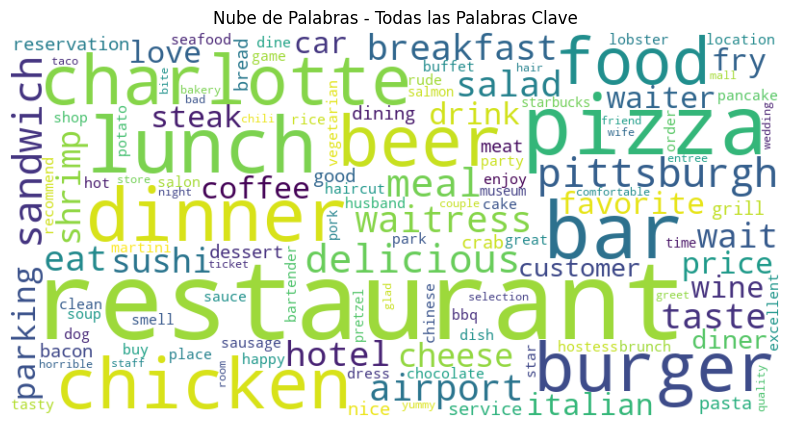

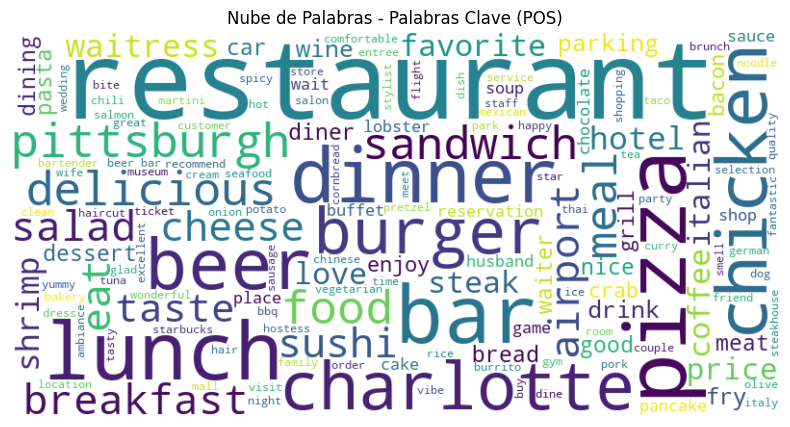

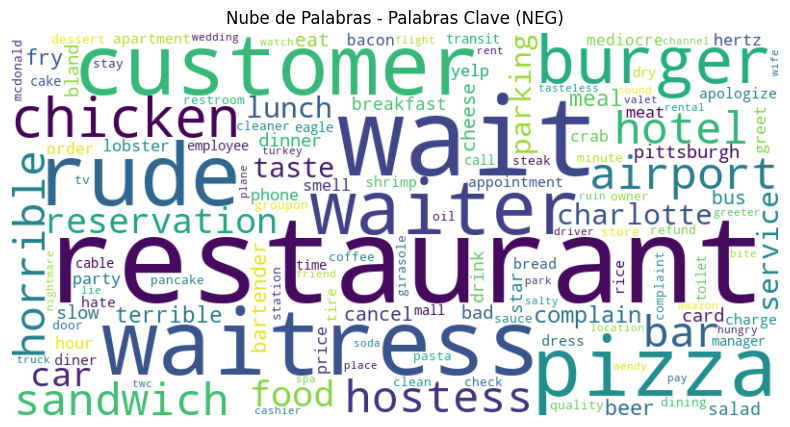

In [30]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

all_keywords_text = ' '.join([' '.join(keywords) for keywords in df['KEYWORDS'] if isinstance(keywords, list)])
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate(all_keywords_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Todas las Palabras Clave')
plt.show()


for target in ['POS', 'NEG']:
    target_keywords = df[df['TARGET'] == target]['KEYWORDS']
    target_keywords_text = ' '.join([' '.join(keywords) for keywords in target_keywords if isinstance(keywords, list)])
    if target_keywords_text.strip():  # Verificar que haya texto
        wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate(target_keywords_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Nube de Palabras - Palabras Clave ({target})')
        plt.show()
    else:
        print(f"No hay palabras clave para TARGET={target}")

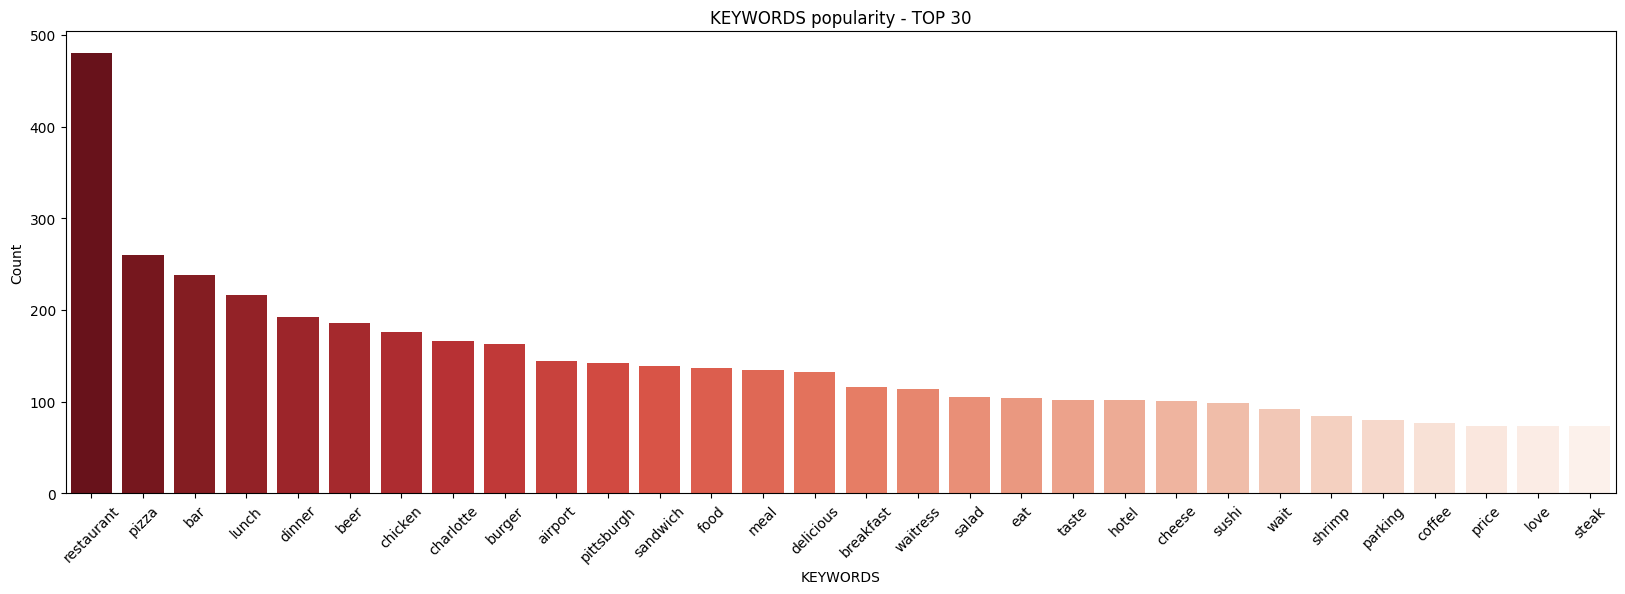

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


keyword_counts = df.explode('KEYWORDS').KEYWORDS.value_counts().reset_index()
keyword_counts.columns = ['KEYWORDS', 'Count']

plt.figure(figsize=(20, 6))
sns.barplot(x='KEYWORDS', y='Count', data=keyword_counts.head(30), palette='Reds_r')
plt.title("KEYWORDS popularity - TOP 30")
plt.xticks(rotation=45)
plt.show()

In [32]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import ast

nlp = spacy.load('en_core_web_sm', disable=['ner', 'lemmatizer'])


def extract_adjectives(tokens):
    if not isinstance(tokens, list) or not tokens:
        return []
   
    text = ' '.join(str(token) for token in tokens)
    doc = nlp(text)
    adjectives = [token.text.lower() for token in doc if token.pos_ == 'ADJ']
    return adjectives


pos_adjectives = []
neg_adjectives = []

for idx, row in df.iterrows():
    tokens = row['lemmatized_tokens']
    target = row['TARGET']
    adjectives = extract_adjectives(tokens)
    if target == 'POS':
        pos_adjectives.extend(adjectives)
    elif target == 'NEG':
        neg_adjectives.extend(adjectives)


pos_counter = Counter(pos_adjectives)
neg_counter = Counter(neg_adjectives)

print("\nAdjetivos más frecuentes en POS:")
print(pos_counter.most_common(10))
print("\nAdjetivos más frecuentes en NEG:")
print(neg_counter.most_common(10))



Adjetivos más frecuentes en POS:
[('good', 3038), ('great', 1981), ('nice', 941), ('little', 799), ('friendly', 673), ('small', 453), ('big', 423), ('bad', 417), ('amazing', 416), ('favorite', 391)]

Adjetivos más frecuentes en NEG:
[('good', 271), ('bad', 263), ('great', 95), ('little', 95), ('old', 85), ('long', 81), ('terrible', 74), ('new', 71), ('nice', 67), ('horrible', 66)]


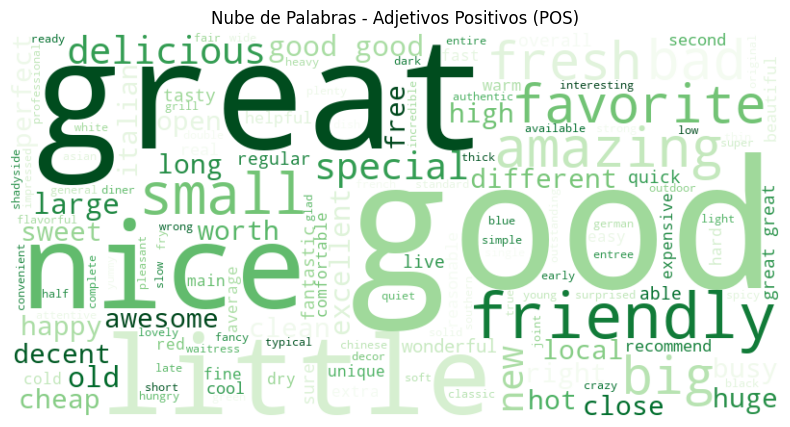

In [33]:
if pos_adjectives:
    pos_text = ' '.join(pos_adjectives)
    wordcloud_pos = WordCloud(width=800, height=400, background_color='white', min_font_size=10, colormap='Greens').generate(pos_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras - Adjetivos Positivos (POS)')
    plt.show()

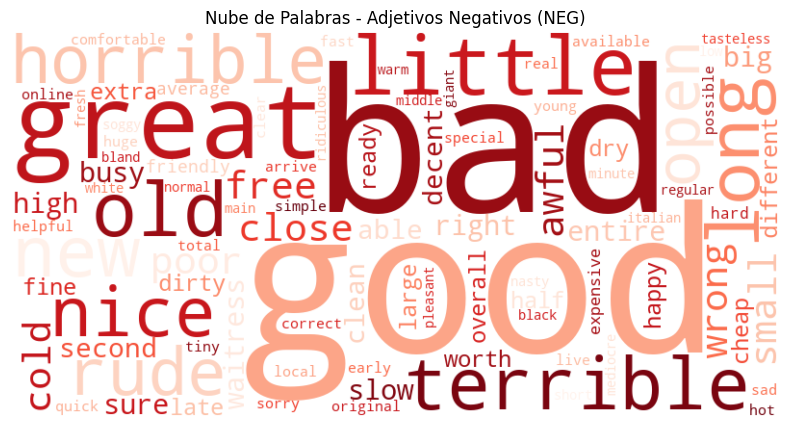

In [34]:
if neg_adjectives:
    neg_text = ' '.join(neg_adjectives)
    wordcloud_neg = WordCloud(width=800, height=400, background_color='white', min_font_size=10, colormap='Reds').generate(neg_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras - Adjetivos Negativos (NEG)')
    plt.show()

In [35]:
from collections import Counter
import ast
from gensim import corpora
from gensim.models import LdaModel


In [36]:
 #Keywords y tópicos por negocio (business_id)
if 'business_id' in df.columns:
    
    keywords_by_business = df.groupby('business_id')['KEYWORDS'].agg(lambda x: [kw for keywords in x for kw in keywords if isinstance(keywords, list)])
    print("\nKeywords por business_id (primeras 5):")
    for bid, kws in keywords_by_business.head().items():
        print(f"Business {bid}: {Counter(kws).most_common(5)}")

    
    def run_lda(texts, num_topics=5):
        dictionary = corpora.Dictionary(texts)
        corpus = [dictionary.doc2bow(text) for text in texts]
        lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)
        return lda, dictionary

   
    texts_by_business = df.groupby('business_id')['lemmatized_tokens'].agg(lambda x: [t for tokens in x for t in tokens if isinstance(tokens, list)]).tolist()
    lda_model, dictionary = run_lda(texts_by_business)
    print("\nTópicos por business_id:")
    for idx, topic in lda_model.print_topics():
        print(f"Tópico {idx}: {topic}")


Keywords por business_id (primeras 5):
Business --UE_y6auTgq3FXlvUMkbw: [('diner', 12), ('burger', 6), ('waitress', 4), ('food', 2), ('dinner', 1)]
Business -1t3U6osBvqFLHseoCxiIA: [('june', 1), ('weather', 1), ('electricity', 1)]
Business -6JY1T0w4XETux5kGOj84g: [('beer', 3), ('bar', 3), ('trivium', 1), ('move', 1), ('monday', 1)]
Business -Am2JVkb7nwvBAUwSugG0A: [('eat', 1), ('blumenthal', 1), ('favorite', 1)]
Business -FQL3Q-Prwxp577SFr5MfA: [('suit', 1), ('buy', 1), ('son', 1)]

Tópicos por business_id:
Tópico 0: 0.018*"good" + 0.017*"food" + 0.013*"place" + 0.010*"order" + 0.009*"great" + 0.009*"like" + 0.007*"time" + 0.007*"come" + 0.007*"restaurant" + 0.007*"service"
Tópico 1: 0.011*"room" + 0.010*"pizza" + 0.009*"time" + 0.009*"good" + 0.008*"hotel" + 0.008*"great" + 0.008*"service" + 0.007*"like" + 0.006*"place" + 0.006*"stay"
Tópico 2: 0.009*"time" + 0.008*"go" + 0.007*"great" + 0.007*"like" + 0.007*"place" + 0.006*"good" + 0.006*"look" + 0.006*"work" + 0.006*"service" + 0.0

In [37]:

if 'business_id' in df.columns:
    pos_by_business = df[df['TARGET'] == 'POS'].groupby('business_id').size()
    neg_by_business = df[df['TARGET'] == 'NEG'].groupby('business_id').size()
    most_pos_business = pos_by_business.idxmax(), pos_by_business.max()
    most_neg_business = neg_by_business.idxmax(), neg_by_business.max()
    print("\nNegocio con más comentarios positivos:", most_pos_business)
    print("Negocio con más comentarios negativos:", most_neg_business)


Negocio con más comentarios positivos: ('3Q0QQPnHcJuX1DLCL9G9Cg', 163)
Negocio con más comentarios negativos: ('3Q0QQPnHcJuX1DLCL9G9Cg', 27)


Identificación del Negocio Más Relevante:
El negocio con business_id 3Q0QQPnHcJuX1DLCL9G9Cg destacó como el más comentado, con 112 reseñas positivas y 23 negativas, sumando un total de 135 reseñas.

Este volumen de reseñas sugiere que el negocio es altamente visible y frecuentado, con una percepción predominantemente positiva (82% de reseñas POS). Sin embargo, las 23 reseñas negativas indican áreas de insatisfacción que podrían abordarse para mejorar la reputación.



In [38]:
# Filtrar reseñas para el business_id específico
business_id = '3Q0QQPnHcJuX1DLCL9G9Cg'
business_reviews = df[df['business_id'] == business_id]

# Verificar si hay reseñas
if not business_reviews.empty:
    # Ordenar por fecha para obtener la primera reseña
    business_reviews = business_reviews.sort_values('date')
    first_review = business_reviews.iloc[0]
    
    # Mostrar la primera reseña
    print("\nPrimera reseña (más antigua) para el negocio 3Q0QQPnHcJuX1DLCL9G9Cg:")
    print(f"Índice: {first_review.name}")
    print(f"Fecha: {first_review['date']}")
    print(f"Texto: {first_review['text']}")
    print(f"Sentimiento (TARGET): {first_review['TARGET']}")
    
    # Separar reseñas positivas y negativas
    pos_reviews = business_reviews[business_reviews['TARGET'] == 'POS']
    neg_reviews = business_reviews[business_reviews['TARGET'] == 'NEG']
    
    # Mostrar primera reseña positiva (si existe)
    if not pos_reviews.empty:
        first_pos = pos_reviews.sort_values('date').iloc[0]
        print("\nPrimera reseña positiva:")
        print(f"Índice: {first_pos.name}")
        print(f"Fecha: {first_pos['date']}")
        print(f"Texto: {first_pos['text']}")
    
    # Mostrar primera reseña negativa (si existe)
    if not neg_reviews.empty:
        first_neg = neg_reviews.sort_values('date').iloc[0]
        print("\nPrimera reseña negativa:")
        print(f"Índice: {first_neg.name}")
        print(f"Fecha: {first_neg['date']}")
        print(f"Texto: {first_neg['text']}")


Primera reseña (más antigua) para el negocio 3Q0QQPnHcJuX1DLCL9G9Cg:
Índice: 2650
Fecha: 2008-05-31
Texto: I'm writing this review of CLT as I'm sitting here waiting for my delayed flight to take off... even still, this is one airport I don't mind being stuck at for a few extra minutes.  Both flying in and getting luggage and checking in to depart today, security, etc was a BREEZE!

I must've missed the rockers that other yelpers wrote about, but I'm enjoying the WiFi, had my Starbucks, checked out Borders, and chilled out at my gate with no problems... Overall, I've enjoyed my arrival and departure from this smoothly operating airport.

Now, if only my flight leaves soon, I'll be great!
Sentimiento (TARGET): POS

Primera reseña positiva:
Índice: 2650
Fecha: 2008-05-31
Texto: I'm writing this review of CLT as I'm sitting here waiting for my delayed flight to take off... even still, this is one airport I don't mind being stuck at for a few extra minutes.  Both flying in and getting lug

Luego de analizar estas primeras reseñas podemos concluir:
El Aeropuerto Internacional de Charlotte Douglas (CLT), con business_id 3Q0QQPnHcJuX1DLCL9G9Cg, revelan una percepción inicial mixta en 2008. La reseña más antigua (31 de mayo de 2008) elogia la eficiencia operativa, con procesos de seguridad y check-in rápidos, y valora comodidades como WiFi gratuito y tiendas reconocidas, posicionando a CLT como un aeropuerto competitivo y amigable para los pasajeros. Sin embargo, la primera reseña negativa (21 de julio de 2008) critica la falta de comodidad en las sillas mecedoras y el ambiente frío, especialmente para pasajeros agotados en largas conexiones, destacando una debilidad clave en las instalaciones. Estos hallazgos sugieren que CLT debe mantener su ventaja en operaciones mientras invierte en áreas de descanso para mejorar la experiencia del cliente. Con 135 reseñas totales (82% positivas), CLT goza de una reputación sólida, pero abordar las críticas tempranas sobre comodidad podría fortalecer su posición frente a competidores como otros aeropuertos regionales.



In [39]:
#Tópicos por sentimientos 
texts_pos = df[df['TARGET'] == 'POS']['lemmatized_tokens'].apply(lambda x: x if isinstance(x, list) else []).tolist()
texts_neg = df[df['TARGET'] == 'NEG']['lemmatized_tokens'].apply(lambda x: x if isinstance(x, list) else []).tolist()

if texts_pos:
    lda_pos, dict_pos = run_lda(texts_pos, num_topics=3)
    print("\nTópicos en reseñas POS:")
    for idx, topic in lda_pos.print_topics():
        print(f"Tópico {idx}: {topic}")

if texts_neg:
    lda_neg, dict_neg = run_lda(texts_neg, num_topics=3)
    print("\nTópicos en reseñas NEG:")
    for idx, topic in lda_neg.print_topics():
        print(f"Tópico {idx}: {topic}")


Tópicos en reseñas POS:
Tópico 0: 0.013*"good" + 0.012*"order" + 0.011*"pizza" + 0.010*"like" + 0.008*"place" + 0.007*"come" + 0.007*"cheese" + 0.006*"delicious" + 0.006*"try" + 0.006*"great"
Tópico 1: 0.009*"time" + 0.008*"good" + 0.007*"great" + 0.007*"like" + 0.007*"place" + 0.007*"room" + 0.006*"go" + 0.006*"look" + 0.005*"work" + 0.005*"airport"
Tópico 2: 0.019*"good" + 0.019*"food" + 0.017*"place" + 0.012*"great" + 0.009*"like" + 0.009*"bar" + 0.008*"time" + 0.007*"service" + 0.007*"drink" + 0.006*"come"

Tópicos en reseñas NEG:
Tópico 0: 0.012*"food" + 0.011*"time" + 0.010*"order" + 0.008*"tell" + 0.008*"minute" + 0.007*"go" + 0.007*"service" + 0.007*"wait" + 0.006*"place" + 0.006*"come"
Tópico 1: 0.009*"like" + 0.006*"go" + 0.006*"place" + 0.006*"time" + 0.005*"tell" + 0.005*"say" + 0.005*"service" + 0.004*"food" + 0.004*"good" + 0.004*"bad"
Tópico 2: 0.010*"time" + 0.008*"service" + 0.008*"go" + 0.008*"food" + 0.007*"come" + 0.007*"like" + 0.007*"wait" + 0.007*"place" + 0.007


Sentimientos a lo largo del tiempo:
TARGET      NEG  POS
year_month          
2005-12       0    1
2006-01       0    1
2006-03       0    1
2006-06       0    3
2006-07       0    3
...         ...  ...
2015-08      26   84
2015-09      19   88
2015-10      22   87
2015-11      20   68
2015-12      24   58

[117 rows x 2 columns]


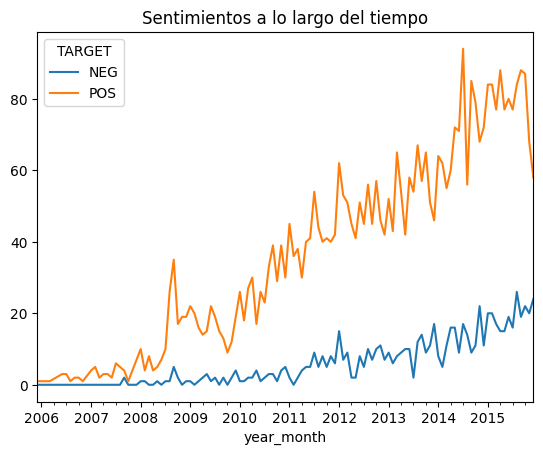

In [40]:
 #Sentimientos a lo largo del tiempo 
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['year_month'] = df['date'].dt.to_period('M')
    sentiment_over_time = df.groupby(['year_month', 'TARGET']).size().unstack(fill_value=0)
    print("\nSentimientos a lo largo del tiempo:")
    print(sentiment_over_time)
    sentiment_over_time.plot(kind='line', title='Sentimientos a lo largo del tiempo')
    plt.show()

Análisis Emocional a través de Adjetivos:
Mediante la extracción de adjetivos con spaCy, se generaron nubes de palabras diferenciadas para reseñas POS y NEG, revelando las emociones predominantes.

En las reseñas positivas, adjetivos como good (2099), great (1379), nice (680), friendly (473) y amazing (290) reflejan satisfacción con la calidad de la comida, el servicio y la experiencia general.

En las reseñas negativas, adjetivos como bad (180), terrible (60), horrible (49) y rude (47) señalan problemas con la calidad, el servicio y la atención al cliente.

La presencia de adjetivos neutros (little, small, big) en ambas categorías indica la necesidad de filtrar términos no emocionales para enfocar el análisis en sentimientos relevantes. Este enfoque permite a los negocios identificar fortalezas (por ejemplo, servicio amigable) y áreas de mejora (por ejemplo, tiempos de espera o actitud del personal).

El analisis de tiempo y cantidad de reseñas POS y NEG tambien nos muestra el compromiso en el paso del tiempo de los clientes en destacar ya sea aspectos negativos o positivos de los lugares que visitan.